In [87]:
import os

In [88]:
os.getcwd()

'C:\\Users\\Omen\\OneDrive\\Desktop'

In [89]:
os.chdir('C:\\Users\\Omen\\OneDrive\\Desktop')
os.getcwd()

'C:\\Users\\Omen\\OneDrive\\Desktop'

<h1>Importing Data</h1>

In [90]:
from netCDF4 import Dataset
import numpy as np

In [91]:
nc_file = 'C:\\Users\\Omen\\OneDrive\\Desktop\\ww\\haldia\\02-02-2020.nc'
fh = Dataset(nc_file, mode='r')
lons = fh.variables['lon_20_ku'][:]
lats = fh.variables['lat_20_ku'][:]
waveforms = fh.variables['waveform_20_ku'][:]
epoch_ocean = fh.variables['epoch_ocean_20_ku'][:]
SWH_ocean = fh.variables['swh_ocean_20_ku'][:]
Amplitude_ocean = fh.variables['amplitude_ocean_20_ku'][:]
ep_ocean = fh.variables['off_nadir_angle_wf_ocean_20_ku'][:]
tracker_range = fh.variables['tracker_range_20_ku'][:]
ocog_range = fh.variables['range_ocog_20_ku'][:]
dist_coast = fh.variables['dist_coast_20_ku'][:]

In [98]:
index = []
for i in range(len(dist_coast)):
    if dist_coast[i] >= -2000 and dist_coast[i] <= 13000:
        index.append(i)

In [99]:
len(index)

1513

In [6]:
from scipy.integrate import quad
from scipy.optimize import minimize

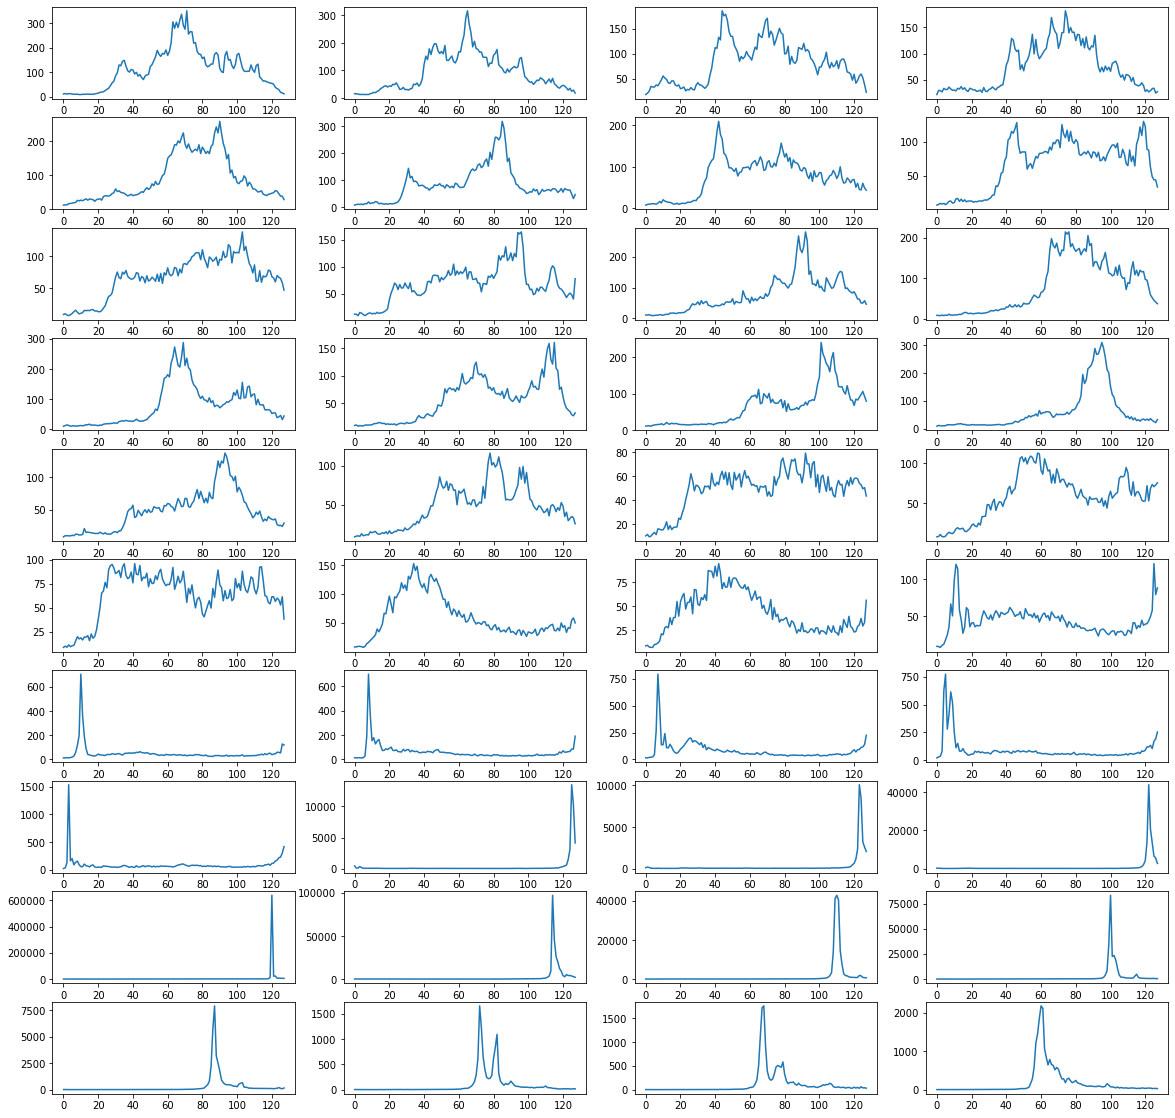

In [100]:
plt.figure(figsize = (20,20))
for i in range(40):
    plt.subplot(10,4,i+1)
    plt.plot(waveforms[index[i]])

<h1> Beta 5 Retracking </h1>

In [103]:
def beta5 (t,b1,b2,b3,b4,b5):
    def Q(t):
        if t < b3 - b4*2:
            return 0
        else:
            return t - b3 - 0.5*b4
    
    def P(x):
        return quad(lambda q : (1/np.sqrt(2*np.pi))*np.exp(-0.5*q**2), -np.inf, x)[0]
    
    y = np.zeros(len(t))
    for i in range(len(t)):
        y[i] = b1 + b2*np.exp((-1)*b5*Q(t[i]))*P((t[i]-b3)/b4)
    return y

In [41]:
import matplotlib.pyplot as plt

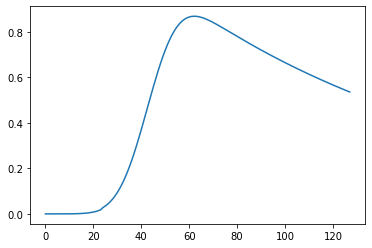

In [104]:
plt.plot(beta5(np.arange(0,128,1),0,1,44,10,0.008))

In [105]:
def residual(x,P,t,A,Tn):
    return np.dot((P-beta5(t, Tn, A, x[0], x[1], x[2])),(P-beta5(t, Tn, A, x[0], x[1], x[2])))

In [106]:
res = minimize(residual,[LEP,W,1],args=(w,np.arange(5,123,1),1,Tn),method='Nelder-Mead',tol = 1e-10, options={'maxiter':1000})

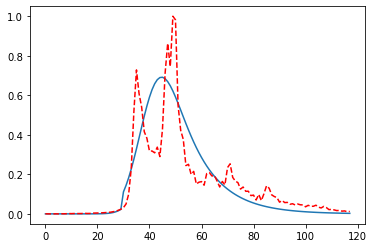

In [110]:
plt.plot(beta5(np.arange(5,123,1),Tn,1,res.x[0],res.x[1],res.x[2]))
plt.plot(w, color='red',linestyle='--')